In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import vclamp_evaluator_HMMtoHH as vcl_ev
import HMM_plotter as plotter
import generalized_genSim_shorten_time_HMM as ggsdHMM
import generalized_genSim_shorten_time as ggsd
#from deap import tools
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st_mod_narrow.csv', 'Basis', 'na12mut8st', 'na16', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp'])
cp_file = './cp.pkl'
channel_name = 'na12mut8st'

{'v_half_act': -24.766773947903665, 'gv_slope': 6.182889399959395, 'v_half_ssi': -54.872868637744034, 'ssi_slope': 7.05877216715777, 'tau0': 0.42009171742316037, 'peak_amp': -3.2027341340615103, 'time_to_peak': 5.17500000000004}


In [2]:
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10,
    8000,
    1,
    1
]

In [3]:
opt_data = pickle.load( open( cp_file, "rb" ) )

In [4]:
print(opt_data.keys())
hof = opt_data['halloffame']
log = opt_data['logbook']

dict_keys(['population', 'generation', 'parents', 'halloffame', 'history', 'logbook', 'rndstate'])


In [5]:
print(log)


gen	nevals	avg    	std        	min      	max        
1  	500   	968352 	1.02193e+06	74.2373  	3.15058e+06
2  	500   	946878 	1.16182e+06	36.4777  	1.79601e+07
3  	500   	664045 	1.81228e+06	82.3044  	4.68721e+07
4  	500   	646289 	971711     	21.7931  	6.51356e+06
5  	500   	707298 	4.13347e+06	34.3191  	1.28104e+08
6  	500   	638014 	1.14592e+06	30.2277  	1.31713e+07
7  	500   	541897 	898815     	19.4669  	2.0435e+06 
8  	500   	560163 	1.01575e+06	13.1145  	1.23014e+07
9  	500   	429128 	932718     	29.8556  	1.18055e+07
10 	500   	524231 	1.03969e+06	14.5057  	1.81075e+07
11 	500   	392392 	810897     	14.5057  	5.04793e+06
12 	500   	507945 	1.03025e+06	8.835    	1.69628e+07
13 	500   	397112 	874515     	8.835    	1.18297e+07
14 	500   	355018 	1.14336e+06	8.835    	2.77175e+07
15 	500   	322907 	743199     	8.835    	2.04299e+06
16 	500   	386770 	2.79931e+06	8.835    	8.5512e+07 
17 	500   	309130 	729464     	8.835    	2.04372e+06
18 	500   	350144 	768996     	8.835    	3.150

In [6]:
best_hof = hof[0]
p = best_hof
print("Best params: " + str(best_hof))
print("[inact_err, act_err]: " + str(evaluator.evaluate_with_lists(best_hof)))
#print("Best invs list: " + str(best_indvs))

Best params: [201.59817890483882, 0.01349955560829405, 0.031846447226877767, 0.17027451529436358, 27.35426198205637, 0.030503511995361256, 0.13539650645943416, 0.012388773333851225, 130.92165181981883, 0.026357162118101747, 1.719431830263046, 0.0820624661301112, 3.903997519908526, 0.5297564533424075, 0.08170159797642063, 0.16796869099802023, 523.4778400845655, 0.03396466372537124, 19.77159170199495, 10.391886942127451, 3130.0438023478055, 3.1732516072124723, 2.6247493135108924]
[0.016791232518428786, 0.008616637486212565, 0.016532550326398613, 1.509322311919463e-08, 2.258590076220758e-05, 0.0]
[<bluepyopt.objectives.Objective object at 0x7fffbe852910>, <bluepyopt.objectives.Objective object at 0x7fffbe877130>, <bluepyopt.objectives.Objective object at 0x7fffbe877190>, <bluepyopt.objectives.Objective object at 0x7fffbe8771f0>, <bluepyopt.objectives.Objective object at 0x7fffbe877250>, <bluepyopt.objectives.Objective object at 0x7fffbe8772b0>, <bluepyopt.objectives.Objective object at 0x

1
2
3
4


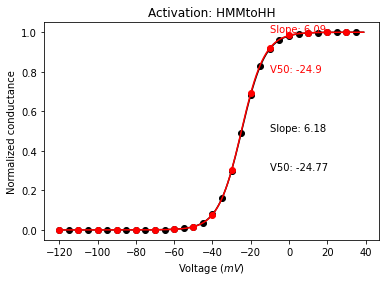

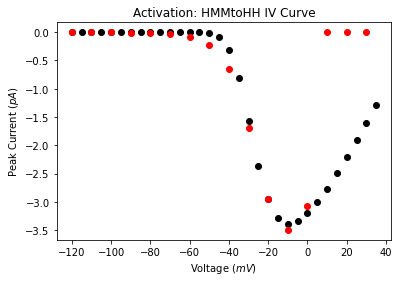

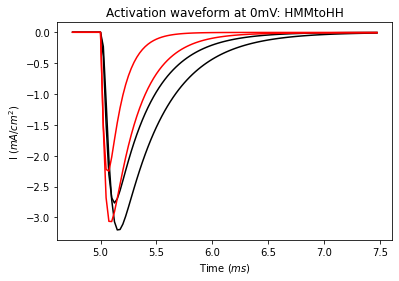

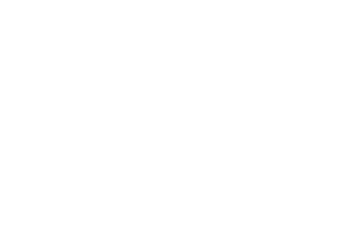

In [7]:
plotter.make_act_plots(p, "HMMtoHH", None, None, "./Plots_Folder/jinan_test.pdf", is_HMM = True, channel_name = channel_name,channel_name_HH = 'na16')

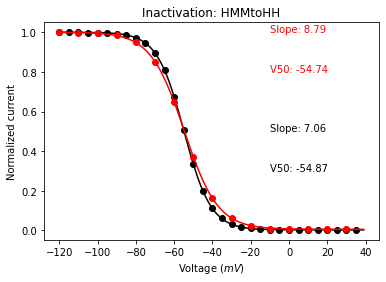

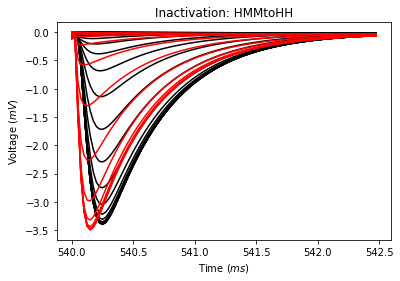

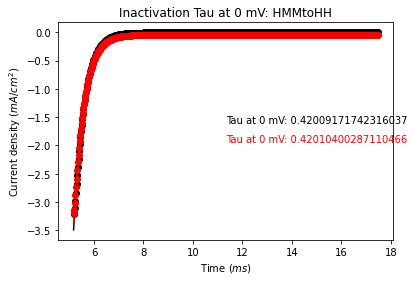

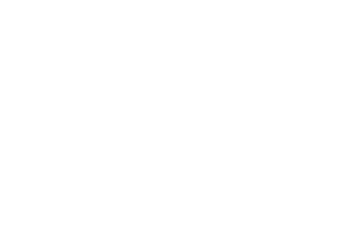

In [8]:
plotter.make_inact_plots(p, "HMMtoHH", None, None, "./Plots_Folder/jinan_test.pdf", is_HMM = True, channel_name = channel_name,channel_name_HH = 'na16')

In [9]:
import eval_helper_na12mut8st as ehn8
import eval_helper_na12mut as ehn
import curve_fitting as cf
act_obj = ggsdHMM.Activation(channel_name='na16')

# Test HH Target data

In [10]:
act_obj = ggsd.Activation(channel_name='na16')
tau0 = ehn.find_tau0(act_obj)

In [11]:
is_HMM = False 
wild_data = {}
# Create genSim objects
act_obj = ggsd.Activation(channel_name='na16')
tau0 = ehn.find_tau0(act_obj)
peak_amp = ehn.find_peak_amp(act_obj)
time_to_peak = ehn.find_time_to_peak(act_obj)
act_obj = ggsd.Activation(channel_name='na16')
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
inact_obj = ggsd.Inactivation(channel_name='na16')
#recov_obj = ggsdHMM.RFI(channel_name=self.channel_name_HH)

ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
#y0, plateau, percent_fast, k_fast, k_slow = cf.calc_recov_obj(recov_obj)
# gv_slope, v_half_act, top, bottom = (1, 1, 1, 1)
# ssi_slope, v_half_inact, top, bottom = (1, 1, 1, 1)
# y0, plateau, percent_fast, k_fast, k_slow = (1, 1, 1, 1, 1)

# Ramp Protocol
# ramp = ggsdHMM.Ramp(channel_name=self.channel_name)
# ramp_area = ramp.areaUnderCurve
# persistent_curr = ramp.persistentCurrent()

wild_data['v_half_act'] = v_half_act
wild_data['gv_slope'] = gv_slope
wild_data['v_half_ssi'] = v_half_inact
wild_data['ssi_slope'] = ssi_slope
#wild_data['tau_fast'] = 1 / k_fast
#wild_data['tau_slow'] = 1 / k_slow
#wild_data['percent_fast'] = percent_fast
# wild_data['udb20'] = 0
wild_data['tau0'] = tau0
# wild_data['ramp'] = ramp_area
# wild_data['persistent'] = persistent_curr

# Some extra objectives added last minute, so this is a bit hard-coded
wild_data['peak_amp'] = peak_amp
wild_data['time_to_peak'] = time_to_peak
print(wild_data)



{'v_half_act': -24.766773947903665, 'gv_slope': 6.182889399959395, 'v_half_ssi': -54.872868637744034, 'ssi_slope': 7.05877216715777, 'tau0': 0.42009171742316037, 'peak_amp': -3.2027341340615103, 'time_to_peak': 5.17500000000004}


# Test HMM

In [12]:
import curve_fitting as cf
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)

In [13]:
print(gv_slope, v_half_act, top, bottom )

6.182889399959395 -24.766773947903665 1.0000000000116729 1.844638323009083e-10


In [14]:
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
           

In [15]:
print(ssi_slope, v_half_inact, top, bottom)

7.05877216715777 -54.872868637744034 0.002864608183022642 1.0008524331966844


In [16]:
import eval_helper as eh
import scoring_functions_relative as sf

objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp']
act_obj = ggsdHMM.Activation(channel_name='na12mut8st')
inact_obj = ggsdHMM.Inactivation(channel_name='na12mut8st')
# recov_obj = ggsdHMM.RFI(channel_name=self.channel_name_HMM)
recov_obj = None
param_values = best_hof
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)


In [17]:
import curve_fitting as cf
errors = []
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
if 'v_half_act' in objective_names:
    vhalf_act_error = (v_half_act - wild_data['v_half_act'])**2
    errors.append(vhalf_act_error)
if 'gv_slope' in objective_names:
    gv_slope_error = (gv_slope - wild_data['gv_slope'])**2
    errors.append(gv_slope_error)
if 'v_half_ssi' in objective_names:
    v_half_ssi_error = (v_half_inact - wild_data['v_half_ssi'])**2
    errors.append(v_half_ssi_error)
if 'ssi_slope' in objective_names:
    ssi_slope_error = (ssi_slope - wild_data['ssi_slope'])**2
    errors.append(ssi_slope_error)
if 'tau0' in objective_names:
    act_obj = ggsdHMM.Activation(channel_name='na12mut8st')
    eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)
    try:
        tau0 = ehn.find_tau0(act_obj)
        tau0_error = (tau0 - wild_data['tau0'])**2
    except e:
        tau0_error = 1000
    errors.append(tau0_error)
if 'peak_current' in objective_names:
    peak_amp = ehn.find_peak_amp(act_obj)
    peak_amp_error = (peak_amp - wild_data['peak_amp'])**2
    errors.append(peak_amp_error)
if 'ttp' in objective_names:
    time_to_peak = ehn.find_time_to_peak(act_obj)
    time_to_peak_error = (time_to_peak - wild_data['time_to_peak'])**2
    errors.append(time_to_peak_error)
print(errors)

[0.016791232518428786, 0.008616637486212565, 0.016532550326398613, 2.9922931901407472, 1.509322311919463e-10, 2.258590076220758e-05, 0.0]


In [18]:
print(objective_names)
print(f" vhalf_act is: {v_half_act} WT:{wild_data['v_half_act']} error: {errors[0]}")
print(f" gv_slope is: {gv_slope} WT:{wild_data['gv_slope']} error: {errors[1]}")
print(f" v_half_ssi is: {v_half_inact} WT:{wild_data['v_half_ssi']} error: {errors[2]}")
print(f" ssi_slope is: {ssi_slope} WT:{wild_data['ssi_slope']} error: {errors[3]}")
print(f" tau0 is: {tau0} WT:{wild_data['tau0']} error: {errors[4]}")
print(f" peak_current is: {peak_amp} WT:{wild_data['peak_amp']} error: {errors[5]}")
print(f" ttp is: {time_to_peak} WT:{wild_data['time_to_peak']} error: {errors[6]}")

['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope', 'tau0', 'peak_current', 'ttp']
 vhalf_act is: -24.89635493616363 WT:-24.766773947903665 error: 0.016791232518428786
 gv_slope is: 6.090063555033466 WT:6.182889399959395 error: 0.008616637486212565
 v_half_ssi is: -54.74428967240989 WT:-54.872868637744034 error: 0.016532550326398613
 ssi_slope is: 8.788596779695338 WT:7.05877216715777 error: 2.9922931901407472
 tau0 is: 0.42010400287110466 WT:0.42009171742316037 error: 1.509322311919463e-10
 peak_current is: -3.197981671461741 WT:-3.2027341340615103 error: 2.258590076220758e-05
 ttp is: 5.17500000000004 WT:5.17500000000004 error: 0.0


In [21]:
print(act_obj.ipeak_vec)

[-2.6597801321319534e-09, -1.7417554349585096e-08, -1.5030332539142267e-07, -1.7050632141436044e-06, -2.293582896983598e-05, -0.00032828551164167, -0.004316917652590901, -0.04333049558872678, -0.28853180734661316, -1.1822241202947095, -2.662678360245558, -3.425437437462079, -3.197981671461741, -2.593434834120083, -1.9616596954598442, -0.004014418690208646]


In [20]:
cf.calc_act_obj(act_obj)

(8.144054744728784,
 -16.490697727705605,
 0.9999999999724376,
 1.1394075505534694e-11)

In [23]:
print(act_obj.ipeak_vec[12])

-3.197981671461741


In [28]:
i12 = act_obj.all_is[12]
print(i12[np.argmin(i12)])

-3.197981671461741


In [29]:
print(act_obj.t_vec[np.argmin(i12)])

5.150000000000039
